In [4]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#integrating seaborn with plt
sns.set()

#standardizing tools
from sklearn.preprocessing import StandardScaler
#clustering tools
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle 


In [5]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col=0)

In [6]:
df_segmentation.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

In [7]:
df_segmentation.describe()

Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.000000  
max       2.000000         2.000000

In [8]:
df_segmentation.corr()

Sex  Marital status       Age  Education    Income  \
Sex              1.000000        0.566511 -0.182885   0.244838 -0.195146   
Marital status   0.566511        1.000000 -0.213178   0.374017 -0.073528   
Age             -0.182885       -0.213178  1.000000   0.654605  0.340610   
Education        0.244838        0.374017  0.654605   1.000000  0.233459   
Income          -0.195146       -0.073528  0.340610   0.233459  1.000000   
Occupation      -0.202491       -0.029490  0.108388   0.064524  0.680357   
Settlement size -0.300803       -0.097041  0.119751   0.034732  0.490881   

                 Occupation  Settlement size  
Sex               -0.202491        -0.300803  
Marital status    -0.029490        -0.097041  
Age                0.108388         0.119751  
Education          0.064524         0.034732  
Income             0.680357         0.490881  
Occupation         1.000000         0.571795  
Settlement size    0.571795         1.000000

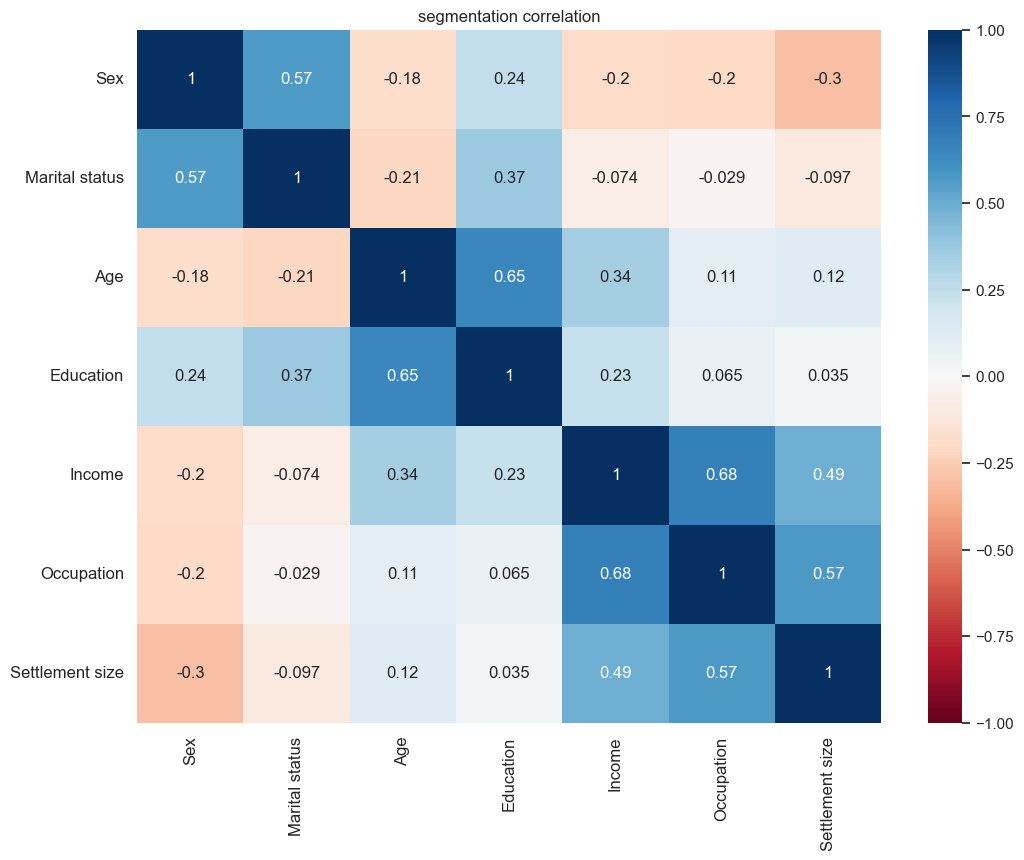

In [9]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), fontsize = 12, rotation = 0 )
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)
plt.title('segmentation correlation')
plt.show()

In [10]:
df_segmentation.Income

ID
100000001    124670
100000002    150773
100000003     89210
100000004    171565
100000005    149031
              ...  
100001996    123525
100001997    117744
100001998     86400
100001999     97968
100002000     68416
Name: Income, Length: 2000, dtype: int64

Text(0.5, 1.0, 'VISUALIZATION OF RAW DATA')

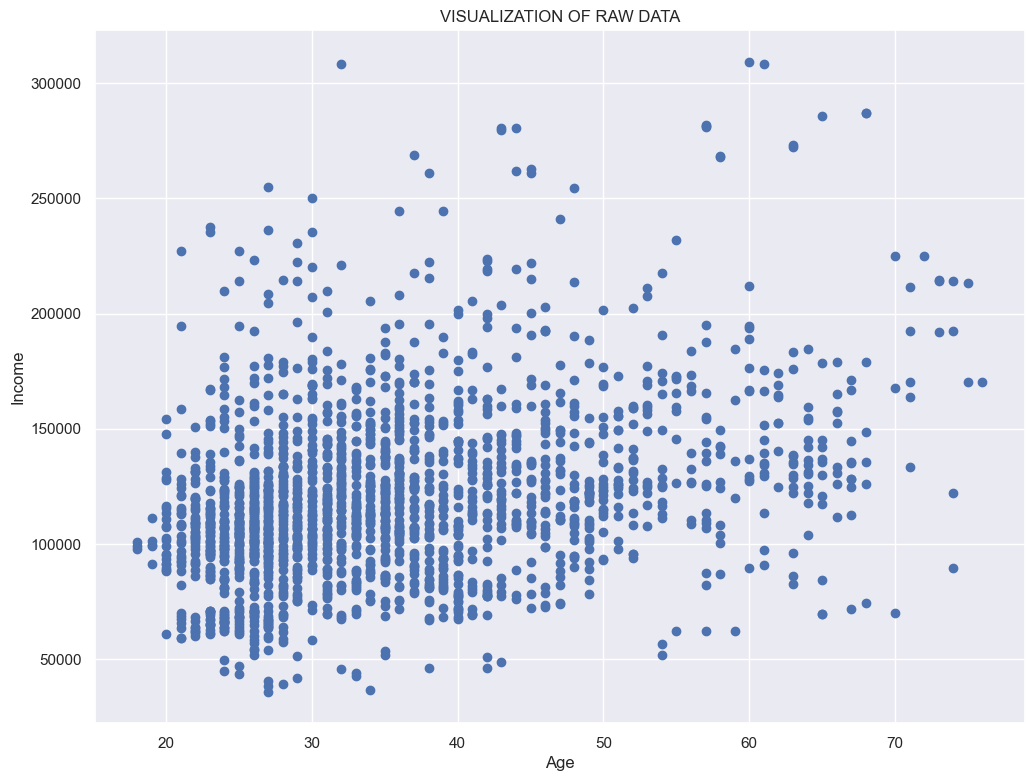

In [11]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.Age,df_segmentation.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('VISUALIZATION OF RAW DATA')

# STANDARDIZATION

In [12]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation) 
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# HIERARCHICAL CLUSTERING

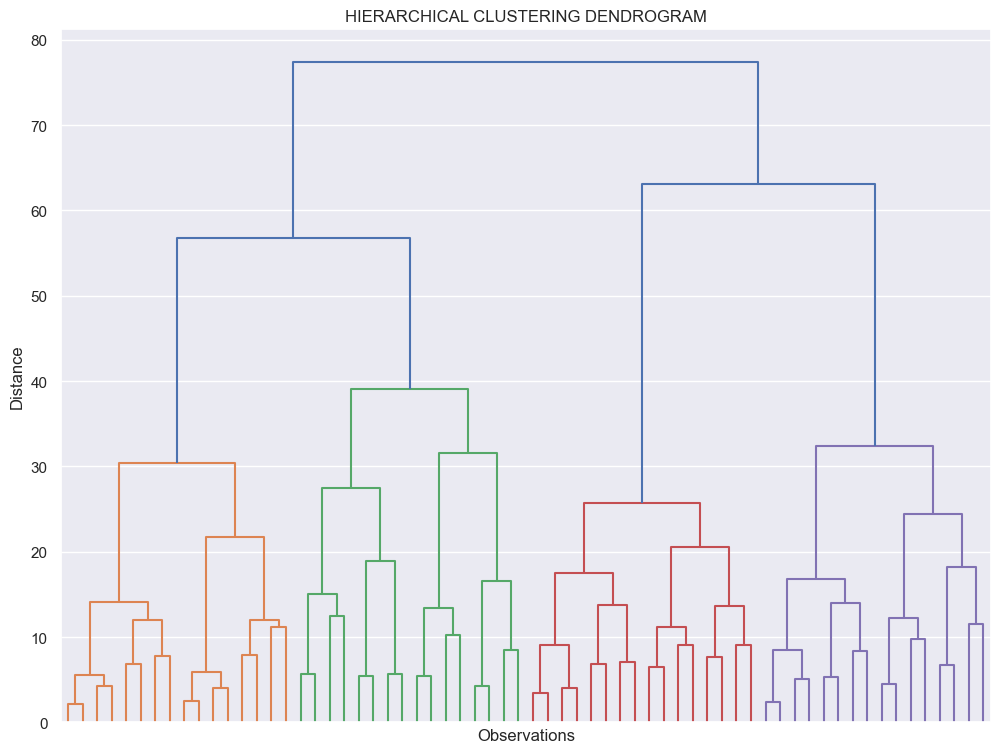

In [13]:
hier_clust = linkage(segmentation_std, method = 'ward')
plt.figure(figsize = (12,9))
plt.title('HIERARCHICAL CLUSTERING DENDROGRAM')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
          show_leaf_counts = False,
           truncate_mode = 'level',
           p = 5,
          no_labels = True,
          )

plt.show()

# K-MEANS CLUSTER

In [14]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

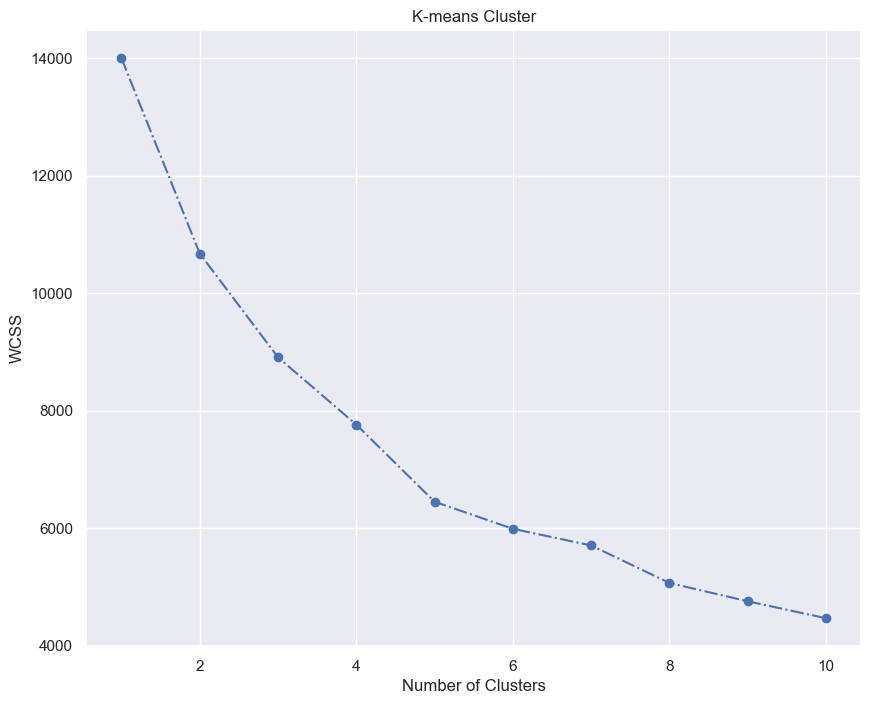

In [15]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Cluster')
plt.show()

In [16]:
kmeans.labels_

array([3, 4, 9, ..., 6, 1, 6])

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)


In [18]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

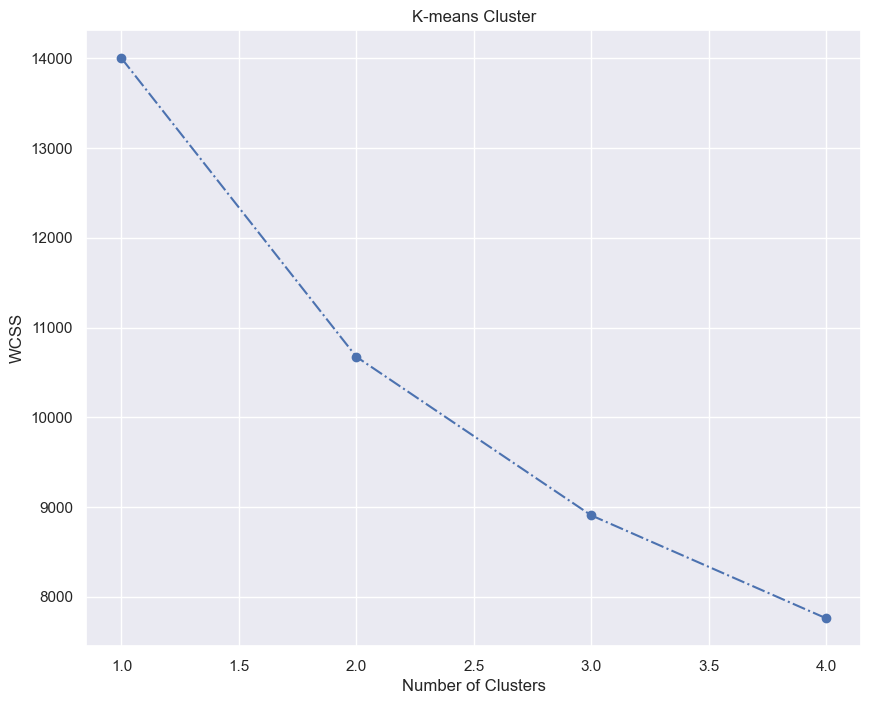

In [19]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), wcss[:4], marker = 'o', linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Cluster')
plt.show()

In [20]:
kmeans.labels_

array([3, 2, 0, ..., 0, 1, 0])

In [21]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means']= kmeans.labels_
df_segm_kmeans

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   
...        ...             ...  ...        ...     ...         ...   
100001996    1               0   47          1  123525           0   
100001997    1               1   27          1  117744           1   
100001998    0               0   31          0   86400           0   
100001999    1               1   24          1   97968           0   
100002000    0               0   25          0   68416           0   

           Settlement size  Segment K-means  
ID                                           
100000001                2                3  
100000002                2                2  
100000003                0                0  
100000004                1                3  
100000005                1                3  
...                    ...              ...  
100001996                0                1  
100001997                0                1  
100001998                0                0  
100001999                0                1  
100002000                0                0  

[2000 rows x 8 columns]

In [22]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

Sex  Marital status        Age  Education  \
Segment K-means                                                   
0                0.066543        0.000000  33.240296   0.489834   
1                0.868254        0.785714  32.928571   1.163492   
2                0.691099        0.979058  29.060209   1.104712   
3                0.149888        0.277405  49.192394   1.467562   

                        Income  Occupation  Settlement size  
Segment K-means                                              
0                109932.785582    0.639556         0.611830  
1                 98466.955556    0.384127         0.006349  
2                126838.926702    1.107330         1.324607  
3                160958.722595    1.364653         1.425056

In [23]:
df_segm_analysis['No of obs'] =df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prob of obs'] = df_segm_analysis['No of obs']/df_segm_analysis['No of obs'].sum()
df_segm_analysis

Sex  Marital status        Age  Education  \
Segment K-means                                                   
0                0.066543        0.000000  33.240296   0.489834   
1                0.868254        0.785714  32.928571   1.163492   
2                0.691099        0.979058  29.060209   1.104712   
3                0.149888        0.277405  49.192394   1.467562   

                        Income  Occupation  Settlement size  No of obs  \
Segment K-means                                                          
0                109932.785582    0.639556         0.611830        541   
1                 98466.955556    0.384127         0.006349        630   
2                126838.926702    1.107330         1.324607        382   
3                160958.722595    1.364653         1.425056        447   

                 Prob of obs  
Segment K-means               
0                     0.2705  
1                     0.3150  
2                     0.1910  
3                     0.2235

### RENAMING THE GROUPS

In [58]:
df_segm_analysis.rename({0: 'Standard', 1: 'Fewer opportunities', 2: 'Well off', 3: 'Career focused'})


Sex  Marital status        Age  Education  \
Segment K-means                                                       
Standard             0.066543        0.000000  33.240296   0.489834   
Fewer opportunities  0.868254        0.785714  32.928571   1.163492   
Well off             0.691099        0.979058  29.060209   1.104712   
Career focused       0.149888        0.277405  49.192394   1.467562   

                            Income  Occupation  Settlement size  No of obs  \
Segment K-means                                                              
Standard             109932.785582    0.639556         0.611830        541   
Fewer opportunities   98466.955556    0.384127         0.006349        630   
Well off             126838.926702    1.107330         1.324607        382   
Career focused       160958.722595    1.364653         1.425056        447   

                     Prob of obs  
Segment K-means                   
Standard                  0.2705  
Fewer opportunities       0.3150  
Well off                  0.1910  
Career focused            0.2235

In [25]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'Standard',
                                                                  1: 'Fewer opportunities',
                                                                  2: 'Well off',
                                                                  3: 'Career focused'})

In [59]:
df_segm_kmeans.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  Segment K-means          Labels  
ID                                                           
100000001                2                3  Career focused  
100000002                2                2        Well off  
100000003                0                0        Standard  
100000004                1                3  Career focused  
100000005                1                3  Career focused

In [79]:
df_career = df_segm_kmeans[df_segm_kmeans['Labels'] == 'Career focused']
df_career.reset_index(inplace = True)

In [70]:
df_career.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Segment K-means', 'Labels'],
      dtype='object')

In [82]:
df_career['Marital status'].value_counts()

Marital status
0    323
1    124
Name: count, dtype: int64

In [84]:
for col in df_career.columns:
    print(df_career[col].value_counts())

ID
100000001    1
100001059    1
100001072    1
100001071    1
100001070    1
            ..
100000627    1
100000625    1
100000617    1
100000616    1
100001573    1
Name: count, Length: 447, dtype: int64
Sex
0    380
1     67
Name: count, dtype: int64
Marital status
0    323
1    124
Name: count, dtype: int64
Age
36    23
42    19
46    17
44    16
40    15
38    15
45    15
64    14
37    14
63    13
57    13
51    13
48    13
43    12
35    12
60    12
50    12
47    11
54    11
52    11
65    11
34    10
61    10
49    10
53    10
55     9
67     9
66     8
33     8
56     8
39     8
41     7
62     7
68     7
58     5
32     4
74     4
31     4
30     4
59     4
71     4
73     3
75     2
29     2
27     2
70     2
28     1
72     1
25     1
76     1
Name: count, dtype: int64
Education
1    240
2    172
3     24
0     11
Name: count, dtype: int64
Income
166712    2
214364    2
145174    2
170113    2
184680    1
         ..
131020    1
136812    1
208446    1
254449    1
128053 

In [86]:
df_well_off = df_segm_kmeans[df_segm_kmeans['Labels'] == 'Well off']
df_well_off.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000002    1               1   22          1  150773           1   
100000010    0               1   28          1  174646           2   
100000013    1               1   22          1  108687           1   
100000015    1               1   28          1  102899           1   
100000025    0               1   26          1  103667           1   

           Settlement size  Segment K-means    Labels  
ID                                                     
100000002                2                2  Well off  
100000010                0                2  Well off  
100000013                2                2  Well off  
100000015                1                2  Well off  
100000025                2                2  Well off

In [88]:
for col in df_well_off.columns:
    print(df_well_off[col].value_counts())

Sex
1    264
0    118
Name: count, dtype: int64
Marital status
1    374
0      8
Name: count, dtype: int64
Age
26    37
28    31
30    26
24    26
23    25
27    25
25    25
29    18
22    17
31    16
35    15
33    15
32    15
34    13
36    13
21    12
20    11
37     7
40     7
38     3
42     3
41     2
44     2
49     2
39     2
53     2
46     2
48     2
18     2
50     2
43     1
47     1
19     1
54     1
Name: count, dtype: int64
Education
1    349
2     26
3      7
Name: count, dtype: int64
Income
107779    2
102543    2
150773    1
90500     1
121757    1
         ..
129651    1
109890    1
137188    1
109892    1
133582    1
Name: count, Length: 380, dtype: int64
Occupation
1    323
2     50
0      9
Name: count, dtype: int64
Settlement size
1    216
2    145
0     21
Name: count, dtype: int64
Segment K-means
2    382
Name: count, dtype: int64
Labels
Well off    382
Name: count, dtype: int64


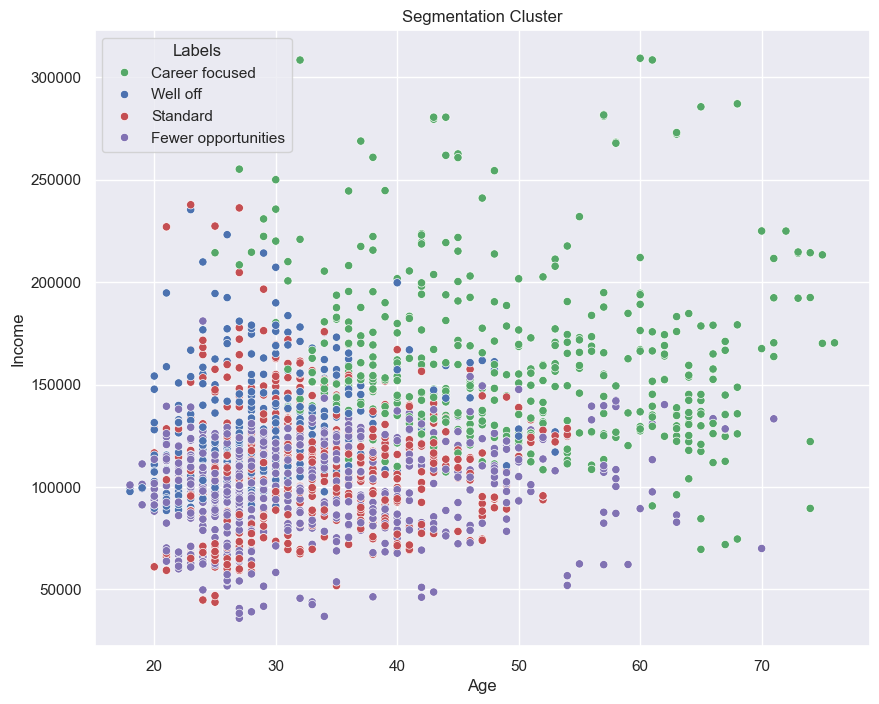

In [89]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis, 
                y=y_axis, 
                hue = df_segm_kmeans['Labels'], 
                palette = ['g','b','r','m'])
plt.title('Segmentation Cluster')
plt.show()


# PCA

In [92]:
pca = PCA()


In [93]:
pca.fit(segmentation_std)

PCA()

In [94]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

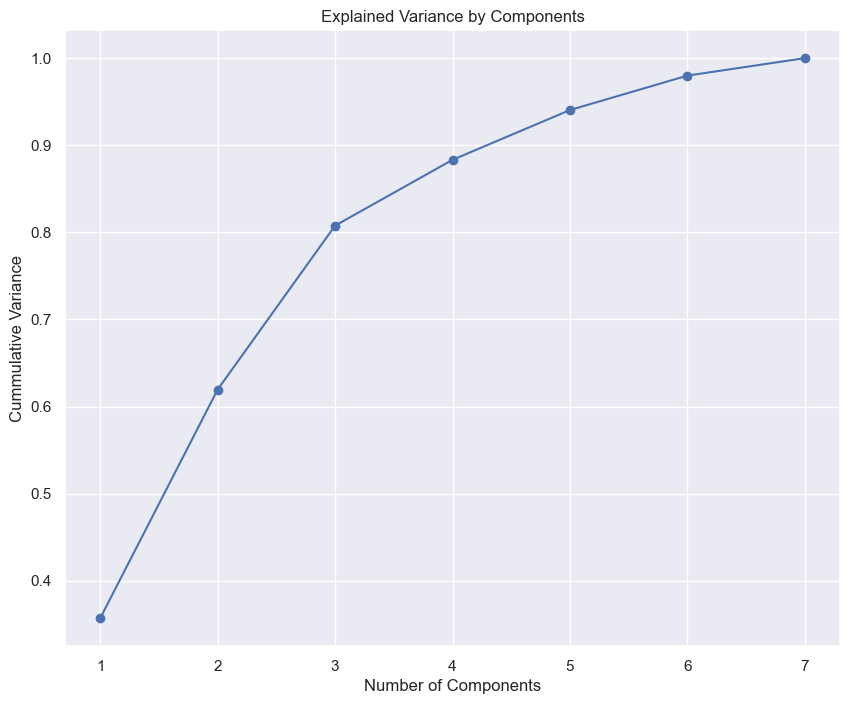

In [95]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = 'solid')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.title('Explained Variance by Components')
plt.show()

In [96]:
pca = PCA(n_components = 3)

In [97]:
pca.fit(segmentation_std)

PCA(n_components=3)

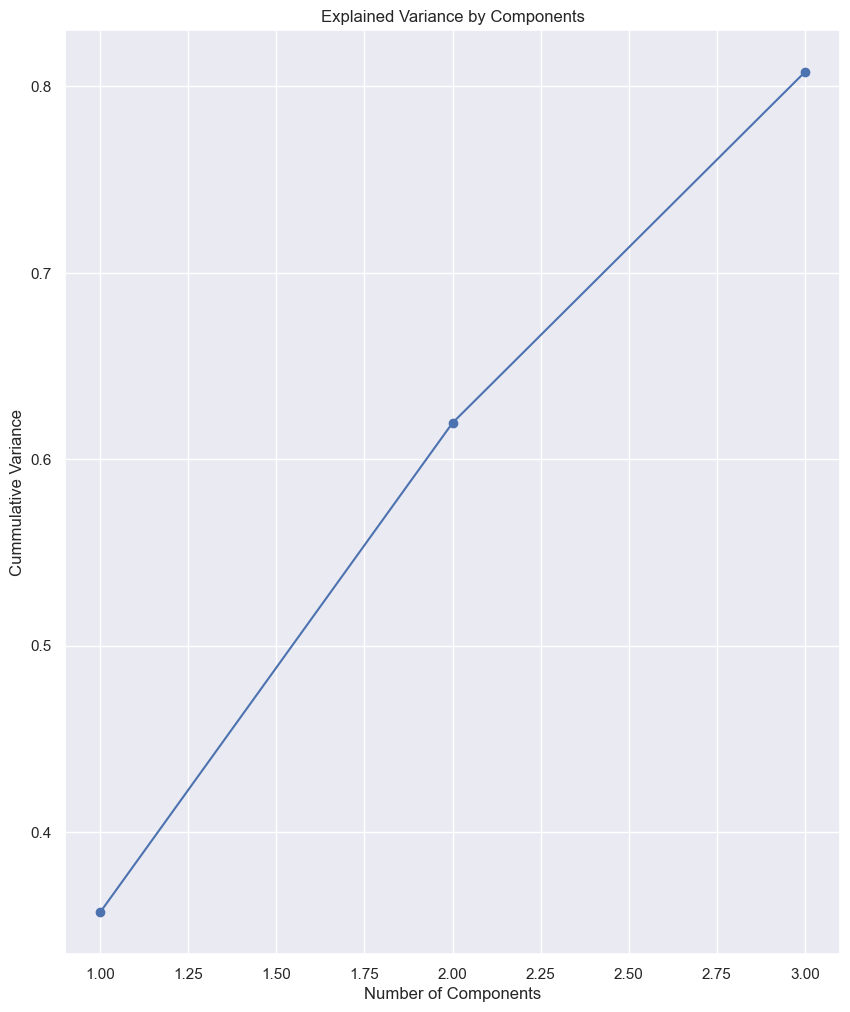

In [98]:
plt.figure(figsize = (10,12))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = 'solid')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.title('Explained Variance by Components')
plt.show()

In [99]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [100]:
df_pca_comp = pd.DataFrame(pca.components_,
                            columns = df_segmentation.columns.values,
                            index = ['component 1','component 2','component 3'])

In [101]:
df_pca_comp

Sex  Marital status       Age  Education    Income  \
component 1 -0.314695       -0.191704  0.326100   0.156841  0.524525   
component 2  0.458006        0.512635  0.312208   0.639807  0.124683   
component 3 -0.293013       -0.441977  0.609544   0.275605 -0.165662   

             Occupation  Settlement size  
component 1    0.492059         0.464789  
component 2    0.014658        -0.069632  
component 3   -0.395505        -0.295685

Text(0.5, 1.0, 'Component correlation')

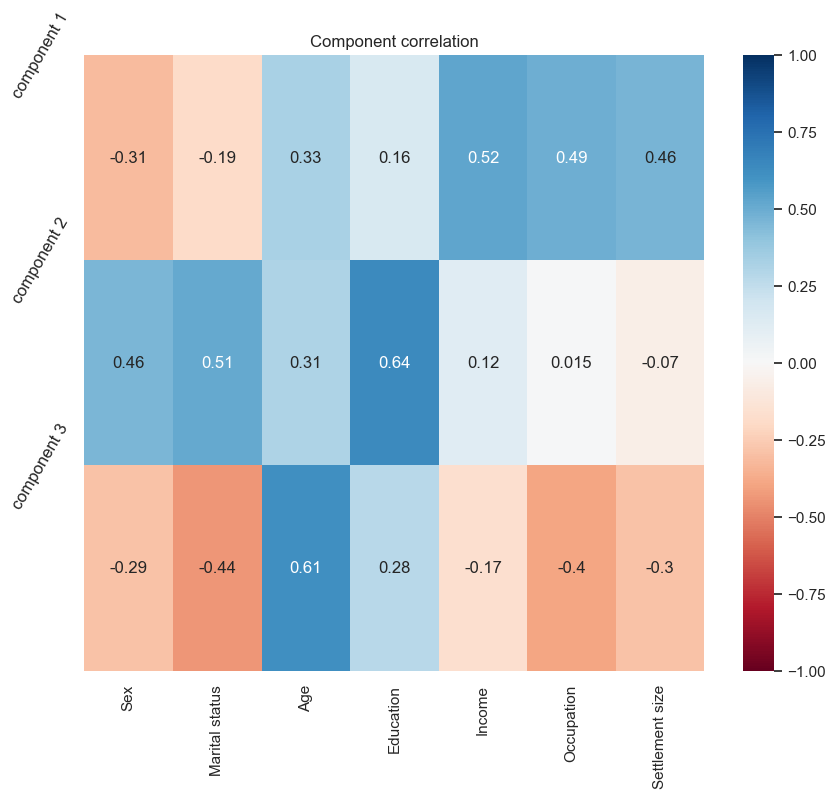

In [102]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_comp,
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu')
plt.yticks([0,1,2],
        ['component 1','component 2','component 3'],
          fontsize = 12,
          rotation = 60)
plt.title('Component correlation')

In [103]:
pca_score = pca.transform(segmentation_std)
pca_score

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [104]:
wcss=[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pca_score)
    wcss.append(kmeans_pca.inertia_)    

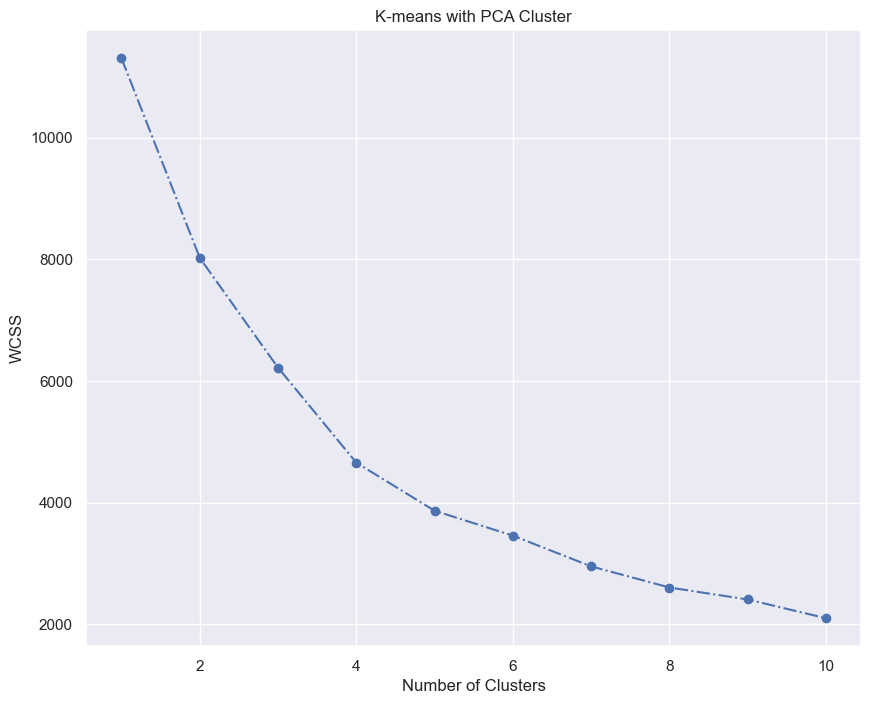

In [105]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Cluster')
plt.show()

In [106]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [107]:
kmeans_pca.fit(pca_score)
kmeans_pca.labels_

array([3, 2, 1, ..., 1, 1, 1])

In [108]:
h = df_segmentation.reset_index(drop = True)
h

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

In [109]:
df_segm_pca_kmeans = pd.concat([h,pd.DataFrame(pca_score)],axis = 1)
df_segm_pca_kmeans.columns.values[-3:] =  ['Career','Education Lifestyle','Experience']
df_segm_pca_kmeans['Segment k-means pca'] = kmeans_pca.labels_

In [110]:
df_segm_pca_kmeans

Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size    Career  Education Lifestyle  Experience  \
0                   2  2.514746             0.834122    2.174806   
1                   2  0.344935             0.598146   -2.211603   
2                   0 -0.651063            -0.680093    2.280419   
3                   1  1.714316            -0.579927    0.730731   
4                   1  1.626745            -0.440496    1.244909   
...               ...       ...                  ...         ...   
1995                0 -0.866034             0.298330    1.438958   
1996                0 -1.114957             0.794727   -1.079871   
1997                0 -1.452298            -2.235937    0.896571   
1998                0 -2.241453             0.627108   -0.530456   
1999                0 -1.866885            -2.454672    0.662622   

      Segment k-means pca  
0                       3  
1                       2  
2                       1  
3                       0  
4                       0  
...                   ...  
1995                    1  
1996                    2  
1997                    1  
1998                    1  
1999                    1  

[2000 rows x 11 columns]

In [111]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment k-means pca']).mean()
df_segm_pca_kmeans_freq

Sex  Marital status        Age  Education  \
Segment k-means pca                                                   
0                    0.001661        0.041528  36.674419   0.684385   
1                    0.627869        0.454098  33.473770   0.944262   
2                    0.762357        0.973384  27.889734   1.007605   
3                    0.492366        0.683206  55.919847   2.129771   

                            Income  Occupation  Settlement size    Career  \
Segment k-means pca                                                         
0                    138482.186047    1.200997         1.255814  1.228891   
1                     88824.154098    0.078689         0.009836 -1.607567   
2                    119503.418251    1.055133         0.813688 -0.395592   
3                    158400.877863    1.125954         1.099237  1.713376   

                     Education Lifestyle  Experience  
Segment k-means pca                                   
0                              -1.220013    0.041063  
1                              -0.110732    0.625678  
2                               0.518043   -1.204763  
3                               2.021006    0.867641

In [112]:
df_segm_pca_kmeans_freq['No of obs'] =df_segm_pca_kmeans[['Segment k-means pca','Sex']].groupby(['Segment k-means pca']).count()
df_segm_pca_kmeans_freq['Prob of obs'] = df_segm_pca_kmeans_freq['No of obs']/df_segm_pca_kmeans_freq['No of obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0: 'Career focused',
                                                          1: 'Fewer opportunities',
                                                          2: 'Standard',
                                                          3: 'Well off'})
df_segm_pca_kmeans_freq

Sex  Marital status        Age  Education  \
Segment k-means pca                                                   
Career focused       0.001661        0.041528  36.674419   0.684385   
Fewer opportunities  0.627869        0.454098  33.473770   0.944262   
Standard             0.762357        0.973384  27.889734   1.007605   
Well off             0.492366        0.683206  55.919847   2.129771   

                            Income  Occupation  Settlement size    Career  \
Segment k-means pca                                                         
Career focused       138482.186047    1.200997         1.255814  1.228891   
Fewer opportunities   88824.154098    0.078689         0.009836 -1.607567   
Standard             119503.418251    1.055133         0.813688 -0.395592   
Well off             158400.877863    1.125954         1.099237  1.713376   

                     Education Lifestyle  Experience  No of obs  Prob of obs  
Segment k-means pca                                                           
Career focused                 -1.220013    0.041063        602        0.301  
Fewer opportunities            -0.110732    0.625678        610        0.305  
Standard                        0.518043   -1.204763        526        0.263  
Well off                        2.021006    0.867641        262        0.131

In [113]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment k-means pca'].map({0: 'Career focused',
                                                          1: 'Fewer opportunities',
                                                          2: 'Standard',
                                                          3: 'well off'})       

In [122]:
df_segm_pca_kmeans['Segment k-means pca']

0       3
1       2
2       1
3       0
4       0
       ..
1995    1
1996    2
1997    1
1998    1
1999    1
Name: Segment k-means pca, Length: 2000, dtype: int32

In [115]:
df_segm_pca_kmeans['Legend']

0                  well off
1                  Standard
2            Career Focused
3       Fewer Opportunities
4       Fewer Opportunities
               ...         
1995         Career Focused
1996               Standard
1997         Career Focused
1998         Career Focused
1999         Career Focused
Name: Legend, Length: 2000, dtype: object

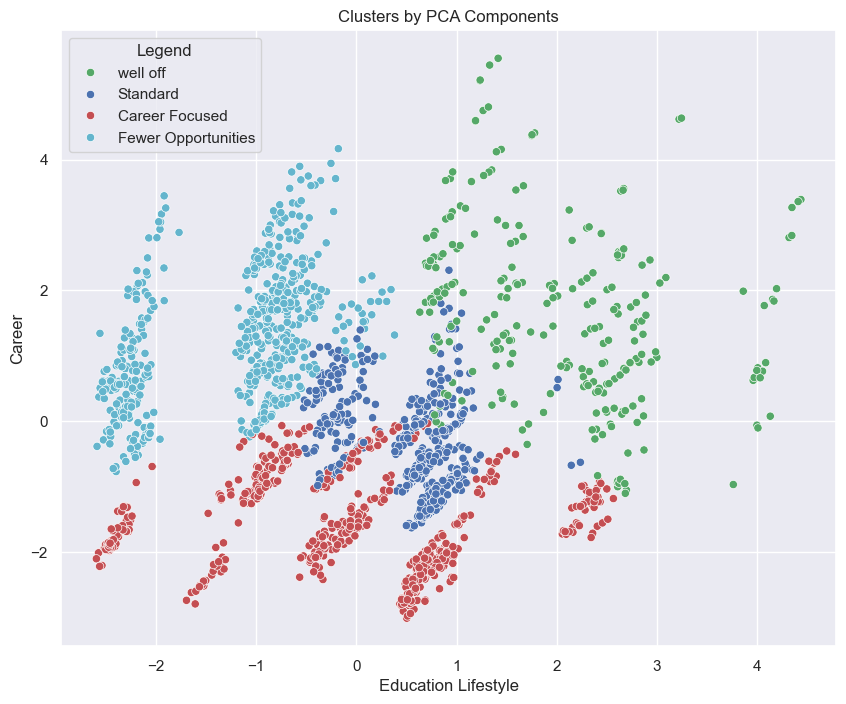

In [116]:
x_axis = df_segm_pca_kmeans['Education Lifestyle']
y_axis = df_segm_pca_kmeans['Career']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','b','r','c'] )
plt.title('Clusters by PCA Components')
plt.show()

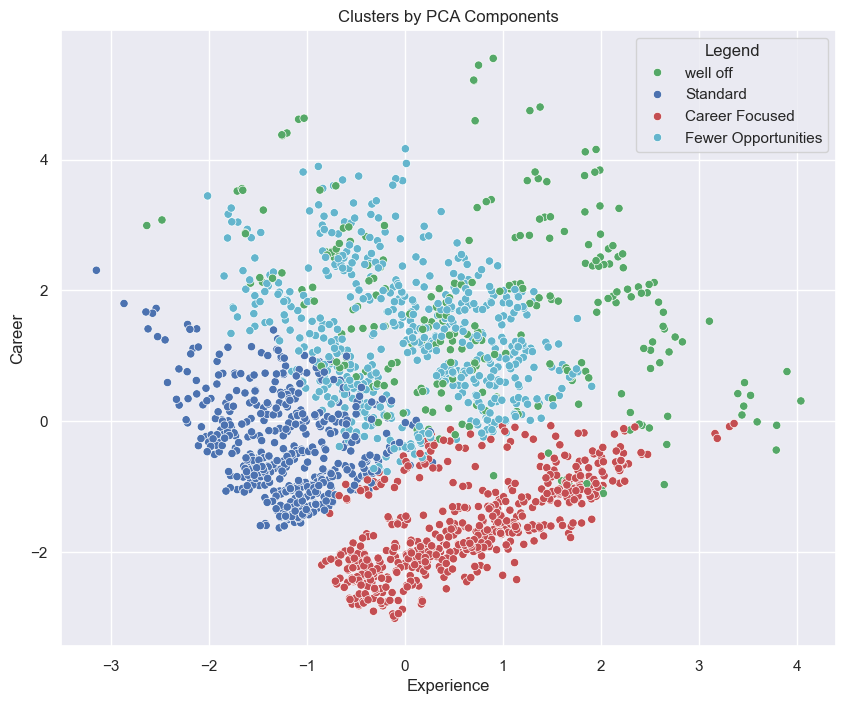

In [117]:
x_axis = df_segm_pca_kmeans['Experience']
y_axis = df_segm_pca_kmeans['Career']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','b','r','c'] )
plt.title('Clusters by PCA Components')
plt.show()

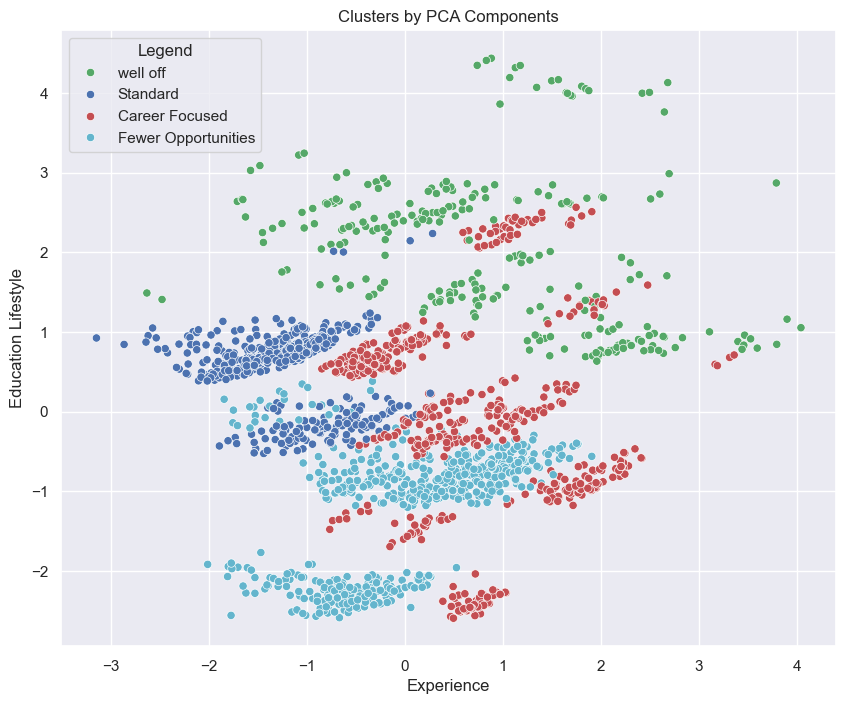

In [118]:
x_axis = df_segm_pca_kmeans['Experience']
y_axis = df_segm_pca_kmeans['Education Lifestyle']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','b','r','c'] )
plt.title('Clusters by PCA Components')
plt.show()

In [119]:
pickle.dump(scaler,open('scaler.pickle','wb'))


In [120]:
pickle.dump(pca, open('pca.pickle','wb'))


In [121]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))